In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('household_power_consumption.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1048575 non-null  object 
 1   Time                   1048575 non-null  object 
 2   Global_active_power    1048575 non-null  object 
 3   Global_reactive_power  1048575 non-null  object 
 4   Voltage                1048575 non-null  object 
 5   Global_intensity       1048575 non-null  object 
 6   Sub_metering_1         1048575 non-null  object 
 7   Sub_metering_2         1048575 non-null  object 
 8   Sub_metering_3         1044506 non-null  float64
dtypes: float64(1), object(8)
memory usage: 72.0+ MB


In [5]:
data.isna().sum()

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           4069
dtype: int64

In [6]:
data.fillna(0,inplace=True)

In [7]:
data.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [8]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16/12/2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [9]:
# Convert 'Date' and 'Time' to a single datetime column
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')

# Drop the original 'Date' and 'Time' columns
data.drop(['Date', 'Time'], axis=1, inplace=True)

# Replace missing values in the dataset with NaN
data.replace('?', pd.NA, inplace=True)

# Convert numeric columns to appropriate data types
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 
                   'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric)


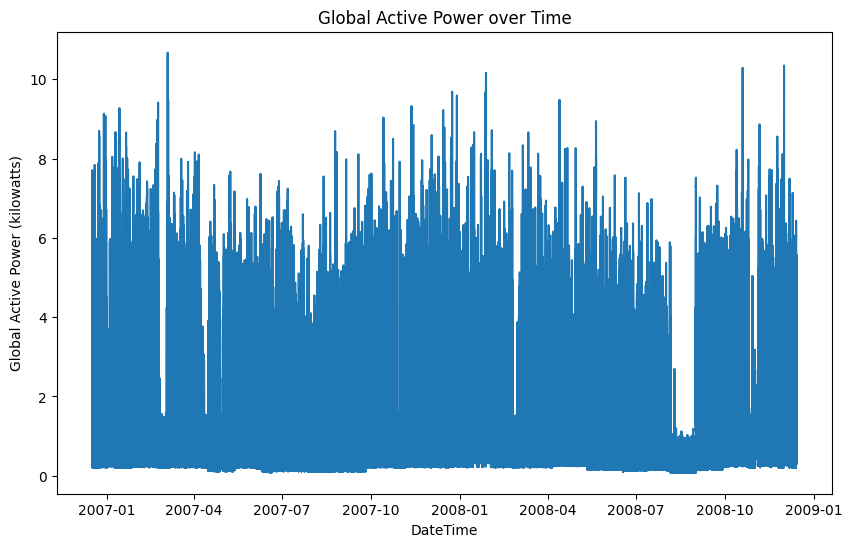

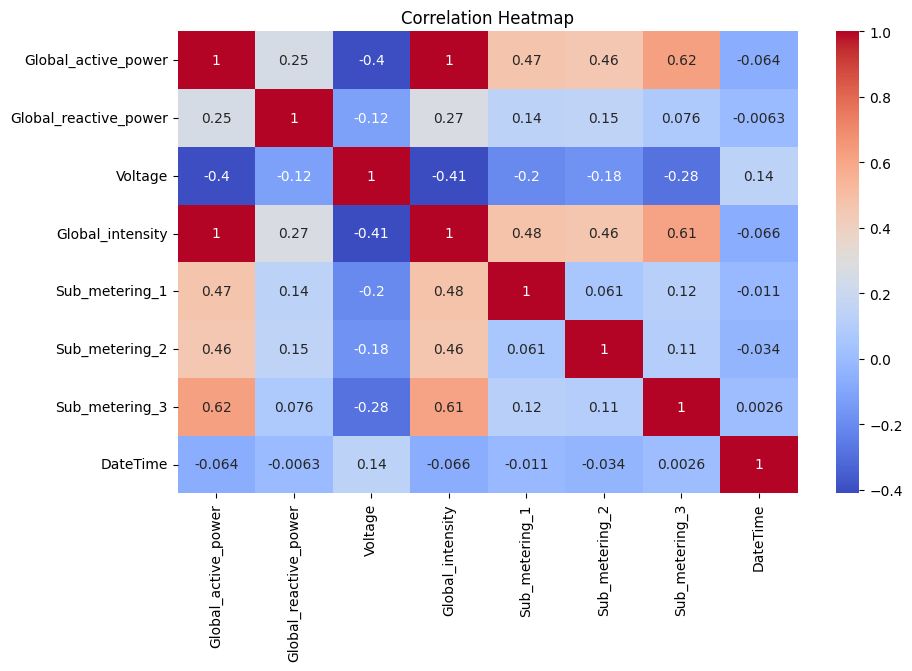

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Global Active Power over time
plt.figure(figsize=(10,6))
plt.plot(data['DateTime'], data['Global_active_power'])
plt.xlabel('DateTime')
plt.ylabel('Global Active Power (kilowatts)')
plt.title('Global Active Power over Time')
plt.show()

# Generate a correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [11]:
# Create new features: Hour, Day, Month
data['Hour'] = data['DateTime'].dt.hour
data['Day'] = data['DateTime'].dt.day
data['Month'] = data['DateTime'].dt.month

# Optionally create rolling averages or lag features
data['Global_active_power_rolling'] = data['Global_active_power'].rolling(window=60).mean()


In [13]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   Global_active_power          1044506 non-null  float64       
 1   Global_reactive_power        1044506 non-null  float64       
 2   Voltage                      1044506 non-null  float64       
 3   Global_intensity             1044506 non-null  float64       
 4   Sub_metering_1               1044506 non-null  float64       
 5   Sub_metering_2               1044506 non-null  float64       
 6   Sub_metering_3               1048575 non-null  float64       
 7   DateTime                     1048575 non-null  datetime64[ns]
 8   Hour                         1048575 non-null  int32         
 9   Day                          1048575 non-null  int32         
 10  Month                        1048575 non-null  int32         
 11  Global_acti

In [17]:
# Check for missing values
print(data.isnull().sum())


Global_active_power            4069
Global_reactive_power          4069
Voltage                        4069
Global_intensity               4069
Sub_metering_1                 4069
Sub_metering_2                 4069
Sub_metering_3                    0
DateTime                          0
Hour                              0
Day                               0
Month                             0
Global_active_power_rolling    6282
dtype: int64


In [36]:
# Combine the features (X) and the target (y) into a single dataframe
data_combined = data[['Global_active_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 
                      'Sub_metering_2', 'Sub_metering_3', 'Hour', 'Day', 'Month']]

# Check for missing values in the combined dataset
print(data_combined.isnull().sum())


Global_active_power    4069
Voltage                4069
Global_intensity       4069
Sub_metering_1         4069
Sub_metering_2         4069
Sub_metering_3            0
Hour                      0
Day                       0
Month                     0
dtype: int64


In [37]:
# Drop rows where any feature or the target variable is NaN
data_clean = data_combined.dropna()

# Split the cleaned dataset into features (X) and target (y)
X = data_clean.drop('Global_active_power', axis=1)
y = data_clean['Global_active_power']
